This is a [kaggle](https://www.kaggle.com/) problem which makes use of classifier modeling to predict if a case will be fraudulent in future. Following is the description of the problem directly copy pasted from kaggle competion [page](https://www.kaggle.com/mlg-ulb/creditcardfraud). I will use this dataset to apply what I have learnt independently from my data science journey.

### Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### Content
The dataset contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

### Inspiration
Identify fraudulent credit card transactions.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the AUC-ROC Curve. Confusion matrix accuracy is not meaningful for unbalanced classification.

In [6]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 8, 4
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing data
credit = pd.read_csv('creditcard.csv')

In [3]:
# size of the dataset
credit.shape

(284807, 31)

In [17]:
#shape of the data
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# info
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
credit.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

None of the columns have missing values and we will be dealing with float values. So we don't need to deal with the missing values imputation process.

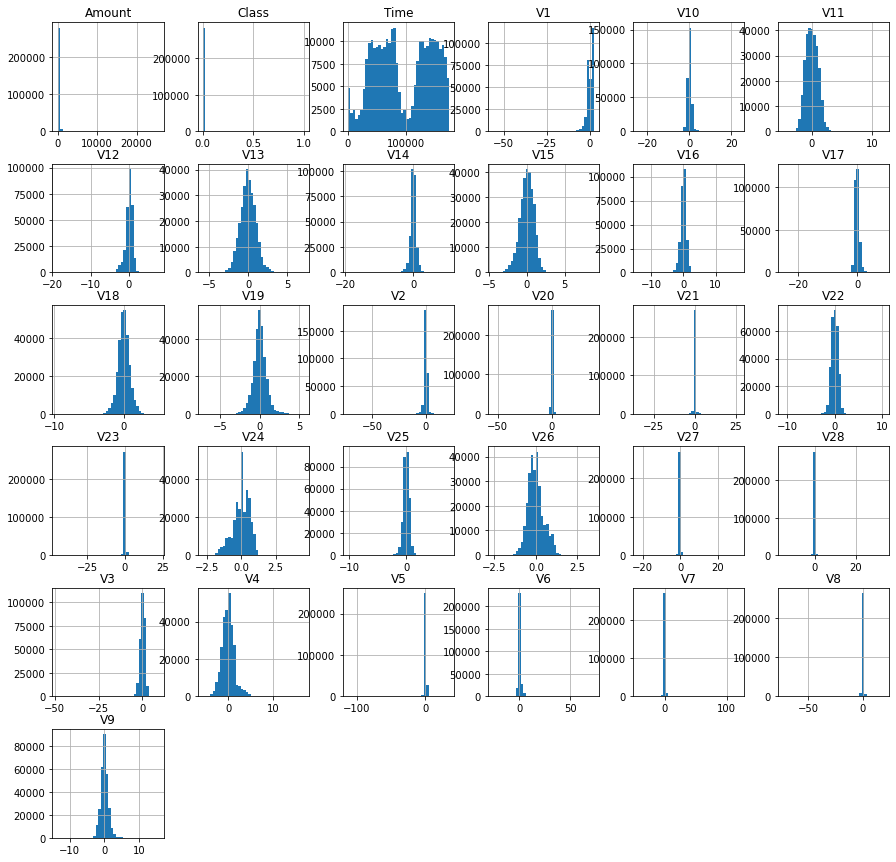

In [16]:
credit.hist(figsize = [15, 15], bins = 40) # Taking 40 bins to see if there are outliers spikes at extremes.
plt.show()

In [6]:
credit.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


From summary and graph we can see most of the predictors have normal distribution without many outliers while others have values around -1 and 1 range. It's interesting to notice the Amount and Time variable. Amount is the transaction happened after x seconds (Mentioned by Time variable) since the very first transaction happened. We can see from the graph that Time density distribution is divided around 1 lacs seconds. So mean and median is nearly associated around that. Amount is averaged around 88 with median 22. Let's explore the relation between Time and Amount.

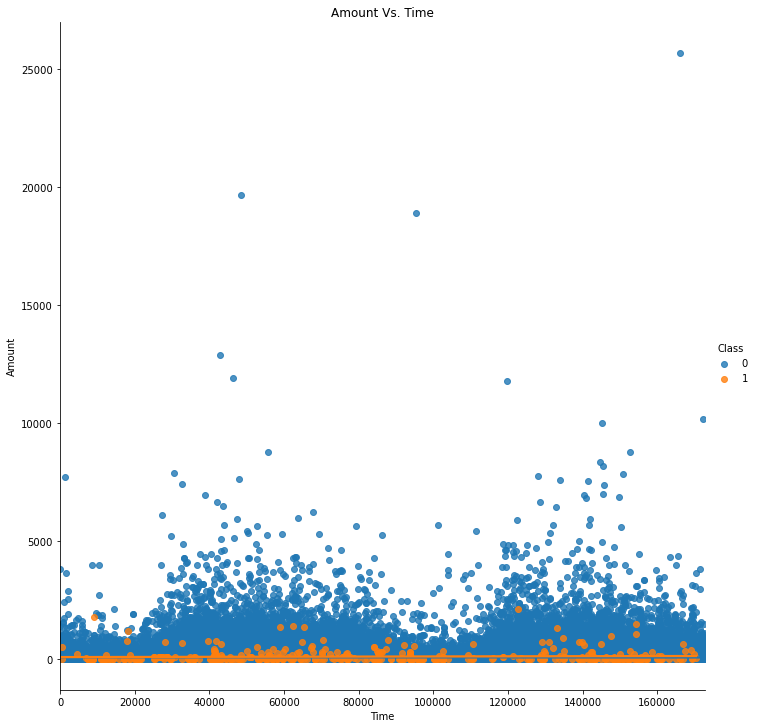

In [5]:
sns.lmplot(x = 'Time', y = 'Amount', data = credit, hue = 'Class', size = 10, aspect = 1)
plt.title('Amount Vs. Time')
plt.show()

In [8]:
ttest_ind(credit[credit['Class'] == 1]['Amount'], credit[credit['Class'] == 0]['Amount'])

Ttest_indResult(statistic=3.00555231397141, pvalue=0.002651220649191683)

Statistically and graphically proven that bad customers tend to have a higher probability to transactions of lower amount. I said statistically, since p-value for the t-test (to compare means of amount for two classes) is less than 0.05 (taking significance level of 5%). It means that if a positive class case is choosen randomly from the data, then we are atleast 95 % sure that that person has done a transaction of high amount as compared to a random negative class case. In our case we have a very low p-value. With the help of this step we can infer that Amount plays a major role in determining the behaviour of the positive class. It should be included as predictors in our model.

### Model Building - Theory

Let's start with the model building process.

We will divide the data into training and testing set. Training and testing data will be used to train and validate the model.

 We will first workout with the SVM  classifier. I have chosen this algorithm as it works on kernel functionality which can transform feature space into both linear and non linear form to build the most optimised decision boundary. 

Before going forward, I suggest you to go through the basics of Support vector classifier and machines. If you feel stuck anywhere please google.

SVM is very versatile and flexible algorithm. It doesn't form hard rigid single separating boundaries just like in KNN, Logistic etc. but rather forms parallel street margin along the classifier. 

It's also caled maximal margin classifier because it works on maximum margin concept around the separating hyperplane. Margin is the maximum minimum perpendicular distance between the hyperplane and the training nearest training instances. The optimized hyperplane is called maximum margin hyperplane. Nearest training instances falling on the hyperplane margin is called support vectors as they support the maximum margin hyperplane in the sense that if they move hyperplane will also move. 

If we have 3 predictors then a (3-1 = 2)-dimensional subspace called hyperplane is formed which separates the classes. 

**Equations would be like:**
* a + b*X1 + c*X2 = 0         (normal hyperplane separator, it's rigid with high variance)
* y(a + b*X1 + c*X2) >= M     (maximal margin classifier with M margin, flexible, more-generalized with low variance)

Our goal is to tune the model's hyperplane equation in the multi-dimensional space such that the margin width is maximum. We need to play with the coefficients of the equation to maximize the margin and choose the best hyperplane.

It predicts in the way that if any test data is passed through the model to make the prediction, those data coordinates (or predictors values) are passed into the hyperplane equation and if the predicted value is greater than 0 then that test data will fall on the right side of the postive class margin. And if the equation gives a value greater than M (Margin width from the hyperplane) then it falls on the positive prediction space. 

It enhances stability and consistant variance. Addition of new instances normally don't affect the boundaries as their structure is confined by the support vectors (data points at the edges of the parallel boundaries).

By further tuning, hard and soft margin boundaries can be formed depending on the underfitting and overfitting respectively. C and gamma can optimize boundaries. Soft and hard boundary classification are two key concepts while building SVM models. I recommend googling about C and gamma hyperparameter tuning.

Soft margin classification allows fewer points (present on the wrong side/outliers) for margin violations(allowing some points to appear on the wrong side of the decision boundary) so that high width decision boundaries can't be build and stable low width boundary street can be formed. It reduces underfitting generalizing better on unseen data with increased score. Hard Margin classification is a kind of reverse of the former where hard rigid boundaries are formed with hard restrictions on margin violations of any class to the wrong side of the separator. It's used to reduce overfitting by enhancing the width length and allowing few instances to fall within the margin street. Generally, hard margin works well with linearly separable data but it's sensitive to outliers. 

You can guess thae we need to make sure that our model doesn't underfit the test data or overfit the training data. We need to optimize this fitting situation.

The best way is to find the trade-off between maximising the decision boundary width while putting a limit to margin violations.

This can be controlled by C and gamma regularization parameters. It controls nature of the classification boundary. Increasing it's value employes soft margin classification (underfitting), low values rigid the boundary. While gamma increases narrowing of the bell-curved shape of the decision boundary. Increase in gamma makes the boundary to cling more around most of the data of the same class and increases the fit. 

This classifier has kernel trick parameter to modify the features to find the best separator. We will see linear, poly and rbf kernel. In Poly and gaussian, we project our data into higher-dimensional space defined by polynomials and Gaussian basis functions, and thereby is able to fit for nonlinear relationships with a linear classifier.

I have learnt these concepts from the famous book called [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems](https://www.lpsm.paris/pageperso/has/source/Hand-on-ML.pdf) and [An Introduction to Statistical Learning - with Applications in R](https://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf).

### Model Building Code

In [39]:
# Making train test data

X = credit.iloc[:,:-1]
y = credit.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

linear
[[71066    16]
 [   77    43]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.73      0.36      0.48       120

    accuracy                           1.00     71202
   macro avg       0.86      0.68      0.74     71202
weighted avg       1.00      1.00      1.00     71202



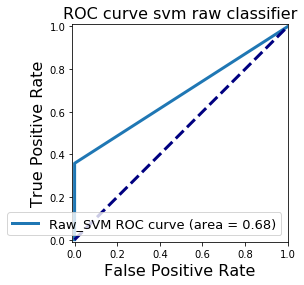

rbf
[[71082     0]
 [  120     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.00      0.00      0.00       120

    accuracy                           1.00     71202
   macro avg       0.50      0.50      0.50     71202
weighted avg       1.00      1.00      1.00     71202



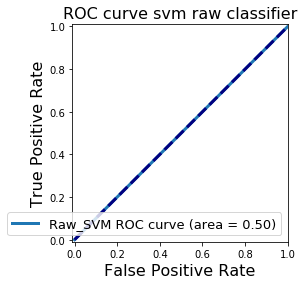

poly
[[71082     0]
 [  120     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.00      0.00      0.00       120

    accuracy                           1.00     71202
   macro avg       0.50      0.50      0.50     71202
weighted avg       1.00      1.00      1.00     71202



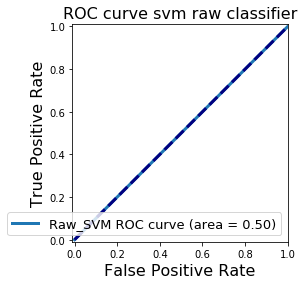

In [10]:
# SVM - linear, rbf -- unscaled
for kernel in ['linear', 'rbf', 'poly']:
    svm = SVC(kernel = kernel).fit(X_train, y_train)
    y_pred_svm = svm.predict(X_test)
    print(kernel)
    print(confusion_matrix(y_test, y_pred_svm))
    print(classification_report(y_test, y_pred_svm))
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)
    roc_auc_svm  = auc(fpr_svm, tpr_svm)

    plt.figure()
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.01])
    plt.plot(fpr_svm, tpr_svm, lw=3, label='Raw_SVM ROC curve (area = {:0.2f})'.format(roc_auc_svm))
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve svm raw classifier', fontsize=16)
    plt.legend(loc='lower right', fontsize=13)
    plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
    plt.axes().set_aspect('equal')
    plt.show()

We can see the linear kernel trick performs the best so we are going to proceed further with the linear approach. 

SVM requires feature scaling of input variables otherwise it will form a strict thinner decision boundary margin street.

## Feature scaling

In [14]:
from sklearn.preprocessing import StandardScaler

X = credit.iloc[:,:-1]
y = credit.iloc[:,-1].values

scaler = StandardScaler()

# Scale the data to be between -1 and 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

linear
[[71062    20]
 [   23    97]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.83      0.81      0.82       120

    accuracy                           1.00     71202
   macro avg       0.91      0.90      0.91     71202
weighted avg       1.00      1.00      1.00     71202



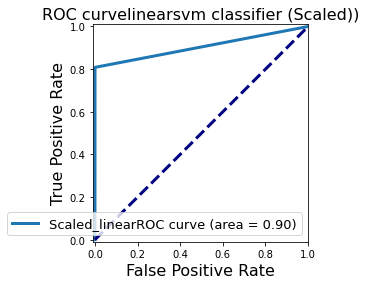

rbf
[[71076     6]
 [   43    77]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.93      0.64      0.76       120

    accuracy                           1.00     71202
   macro avg       0.96      0.82      0.88     71202
weighted avg       1.00      1.00      1.00     71202



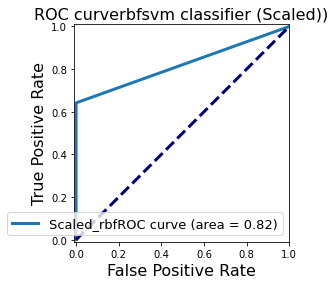

poly
[[71072    10]
 [   29    91]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.90      0.76      0.82       120

    accuracy                           1.00     71202
   macro avg       0.95      0.88      0.91     71202
weighted avg       1.00      1.00      1.00     71202



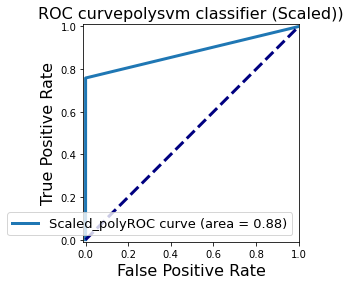

In [4]:
# SVM - linear, rbf -- scaled
for kernel in ['linear', 'rbf', 'poly']:
    svm = SVC(kernel = kernel).fit(X_train, y_train)
    y_pred_svm = svm.predict(X_test)
    print(kernel)
    print(confusion_matrix(y_test, y_pred_svm))
    print(classification_report(y_test, y_pred_svm))
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)
    roc_auc_svm  = auc(fpr_svm, tpr_svm)

    plt.figure()
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.01])
    plt.plot(fpr_svm, tpr_svm, lw=3, label='Scaled_' + str(kernel) + 'ROC curve (area = {:0.2f})'.format(roc_auc_svm))
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve' + str(kernel) + 'svm classifier (Scaled))', fontsize=16)
    plt.legend(loc='lower right', fontsize=13)
    plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
    plt.axes().set_aspect('equal')
    plt.show()

**We can compare the performances**
* Unscaled: 0.68
* Scaled: 90

See how greatly scaling improvises the results.

It is interesting to notice that the target distribution is highly imbalanced. 

While forming the boundary, model gives equal weightage to both the classes and somehow our positive class with less than 0.2 percentage gets off the radar of equal prediction treatment. It's highly beneficial to weigh the targets in the algorithm while tuning the model. It will improve reducing false negatives and improving the recall.

SVM that weighs the margin proportional to the class importance is often referred to as weighted SVM, or cost-sensitive SVM. I learnt this concept by one of the [article](https://machinelearningmastery.com/cost-sensitive-svm-for-imbalanced-classification/) of my Famous [Jason Brownlee](https://machinelearningmastery.com/about/).

#### Applying weighted svm

In [5]:
x = pd.datetime.now()
# define model
model = SVC(gamma='scale')
# define grid
balance = ['balanced', {0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}, {0:0.173, 1:99.826}] # Tuning the weight penality
param_grid = dict(class_weight=balance)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X_train, y_train)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
y = pd.datetime.now()
print('Total Execution Time: {}'.format(y-x))

Best: 0.971566 using {'class_weight': {0: 0.173, 1: 99.826}}
0.970626 (0.015497) with: {'class_weight': 'balanced'}
0.945776 (0.022027) with: {'class_weight': {0: 100, 1: 1}}
0.945776 (0.022027) with: {'class_weight': {0: 10, 1: 1}}
0.946734 (0.021524) with: {'class_weight': {0: 1, 1: 1}}
0.962536 (0.019867) with: {'class_weight': {0: 1, 1: 10}}
0.969903 (0.016913) with: {'class_weight': {0: 1, 1: 100}}
0.971566 (0.014771) with: {'class_weight': {0: 0.173, 1: 99.826}}
Total Execution Time: 4:53:55.783083


We have used Grid Search method. All possible combinations of parameters were passed in the model and a 10 fold cross validation is done with three repeats (to reduce overfitting and stablized performance). Performance was compared with all different combinations and best parameters were printed. Scoring metric was auc_roc.

To evaluate the performance, choice of the metric is very important in our case auc has been already asked because we need to focus on both the classes. Good customers are loyal customers and bad ones are the liabilities. We need to track both to deal accordingly. May be giving extra offers and benefits to good cutomers is also equally as important as avoiding future loss in case of bad ones. 

In general, if the positive class is the most important, then the precision-recall curve and area under curve (PR AUC) can be used. This will optimize both precision and recall across all thresholds.

Alternately, if both classes are equally important, the ROC Curve and area under curve (ROC AUC) can be used. This will maximize the true positive rate and minimize the false positive rate.

If the positive class is more important, then variations of the F-Measure can be used that optimize the precision and recall. If both false positive and false negatives are equally important, then F1 can be used. If false negatives are more costly, then the F2-Measure can be used, otherwise, if false positives are more costly, then the F0.5-Measure can be used.

#### Evaluating performance metrics for the best model 

In [15]:
# Fitting the final model
svc_weighted = SVC(kernel='linear', class_weight = {0: 0.173, 1: 99.826}).fit(X_train, y_train)

# roc for training data
y_pred_weighted_train = svc_weighted.predict(X_train)
fpr_svm_train, tpr_svm_train, _ = roc_curve(y_train, y_pred_weighted_train)
roc_auc_svm_train  = auc(fpr_svm_train, tpr_svm_train)

# roc for test data
y_pred_weighted_test = svc_weighted.predict(X_test)
fpr_svm_test, tpr_svm_test, _ = roc_curve(y_test, y_pred_weighted_test)
roc_auc_svm_test  = auc(fpr_svm_test, tpr_svm_test)

# Printing outputs 
print('auc_roc score for training set: {:.3f}'.format(roc_auc_svm_train))
print('auc_roc score for test set: {:.3f}'.format(roc_auc_svm_test))

print('The Confusion Matrix for training set:\n {}'.format(confusion_matrix(y_train, y_pred_weighted_train)))
print('The Confusion Matrix for test set:\n {}'.format(confusion_matrix(y_test, y_pred_weighted_test)))

print('The Classification Report for training set:\n {}'.format(classification_report(y_train, y_pred_weighted_train)))
print('The Classification Report for test set:\n {}'.format(classification_report(y_test, y_pred_weighted_test)))

auc_roc score for training set: 0.949
auc_roc score for test set: 0.937
The Confusion Matrix for training set:
 [[209394   3839]
 [    31    341]]
The Confusion Matrix for test set:
 [[69826  1256]
 [   13   107]]
The Classification Report for training set:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    213233
           1       0.08      0.92      0.15       372

    accuracy                           0.98    213605
   macro avg       0.54      0.95      0.57    213605
weighted avg       1.00      0.98      0.99    213605

The Classification Report for test set:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     71082
           1       0.08      0.89      0.14       120

    accuracy                           0.98     71202
   macro avg       0.54      0.94      0.57     71202
weighted avg       1.00      0.98      0.99     71202



**Comparing the performances**
* Unscaled: 0.680
* Scaled: 0.900
* Weighted: 0.937

#### Plotting auc scores for training and testing data for the Final_Optimized_Weighted_SVM

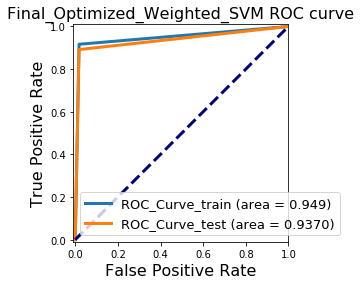

In [34]:
plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_svm_train, tpr_svm_train, lw=3, label='ROC_Curve_train (area = {:0.3f})'.format(roc_auc_svm_train))
plt.plot(fpr_svm_test, tpr_svm_test, lw=3, label='ROC_Curve_test (area = {:0.4f})'.format(roc_auc_svm_test))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Final_Optimized_Weighted_SVM ROC curve', fontsize=16)
plt.legend(loc=3, fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

**Visualizing the decision boundary for this model**
* In this we will see where predicted classes fall wrt to the classifier decision boundaries.
* First we need to find the two most important variables for the target prediction and then we will plot the feature space wrt to these two variables.

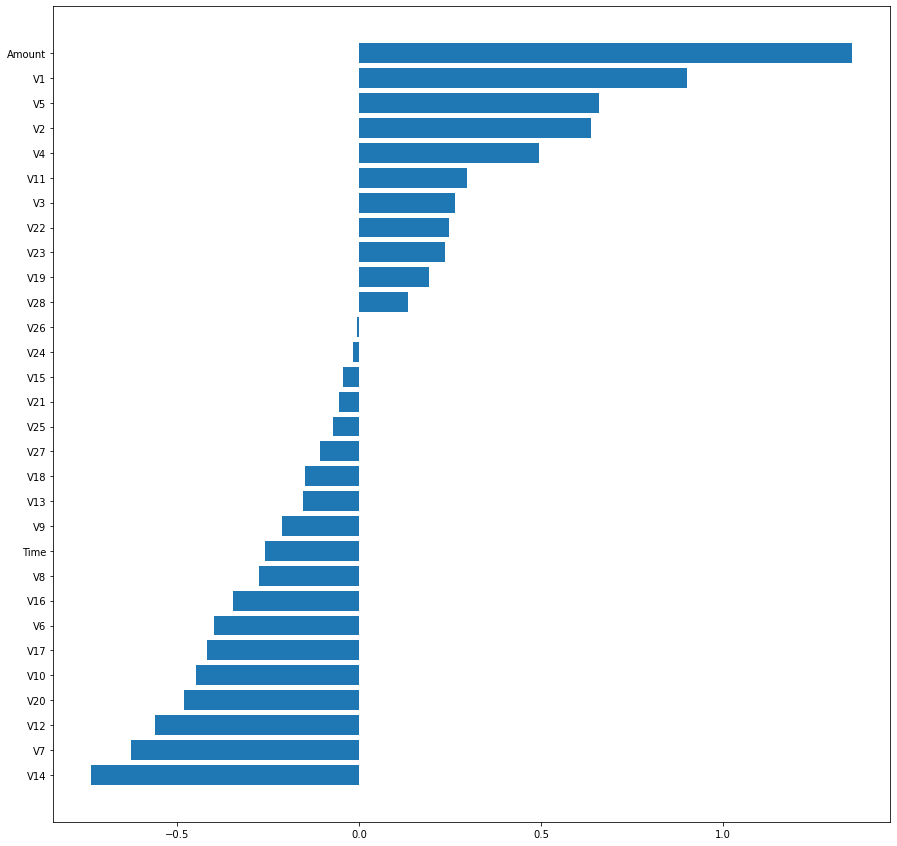

In [40]:
def f_importances(coef, names):
    imp = coef.ravel()
    imp, names = zip(*sorted(zip(imp,names)))
    plt.rcParams['figure.figsize'] = 15, 15
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = X.columns.tolist()
f_importances(svc_weighted.coef_, features_names)

As expected Amount plays a major role in prediction as also suggested by ttest.

#### Decision Tree Classifier - Model Building

It's a tree based algorithm with flow-chart like structure.

In [5]:
from sklearn.tree import DecisionTreeClassifier

# Creating predctors and target data
X = credit.iloc[:,:-1]
y = credit.iloc[:,-1].values

# Splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [7]:
# Fitting the default decision tree model
dt = DecisionTreeClassifier().fit(X_train, y_train)
tree_predicted_train = dt.predict(X_train)
tree_predicted_test = dt.predict(X_test)

# roc for training data
fpr_dt_train, tpr_dt_train, _ = roc_curve(y_train, tree_predicted_train)
roc_auc_dt_train  = auc(fpr_dt_train, tpr_dt_train)

# roc for test data
fpr_dt_test, tpr_dt_test, _ = roc_curve(y_test, tree_predicted_test)
roc_auc_dt_test = auc(fpr_dt_test, tpr_dt_test)

#### Printing outputs for the default decision tree model

In [7]:
# Printing outputs for default decision tree model
print('auc_roc score for training set: {:.3f}'.format(roc_auc_dt_train))
print('auc_roc score for test set: {:.3f}'.format(roc_auc_dt_test))

print('The Confusion Matrix for training set:\n {}'.format(confusion_matrix(y_train, tree_predicted_train)))
print('The Confusion Matrix for test set:\n {}'.format(confusion_matrix(y_test, tree_predicted_test)))

print('The Classification Report for training set:\n {}'.format(classification_report(y_train, tree_predicted_train)))
print('The Classification Report for test set:\n {}'.format(classification_report(y_test, tree_predicted_test)))

auc_roc score for training set: 1.000
auc_roc score for test set: 0.887
The Confusion Matrix for training set:
 [[213233      0]
 [     0    372]]
The Confusion Matrix for test set:
 [[71053    29]
 [   27    93]]
The Classification Report for training set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    213233
           1       1.00      1.00      1.00       372

    accuracy                           1.00    213605
   macro avg       1.00      1.00      1.00    213605
weighted avg       1.00      1.00      1.00    213605

The Classification Report for test set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.76      0.78      0.77       120

    accuracy                           1.00     71202
   macro avg       0.88      0.89      0.88     71202
weighted avg       1.00      1.00      1.00     71202



We can see it's giving 100 % overfit on training data and underfitting on test data. It has low bias and high variance. It requires hyperparameter optimization to derive the best model. It was a simple data that the advanced algorithm like decision tree can easily fit thus giving 100 % fit. We will use grid search to reduce overfitting.

In order to apply grid search over some ranges for different tuning parameters, it's very important to see how various parameters are performing on train-test separately. It will give us an idea of ranges to take in grid search. We can't make make random range feeding in the grid search. 

#### Hyperparameter tuning of decision tree.

1) Max depth

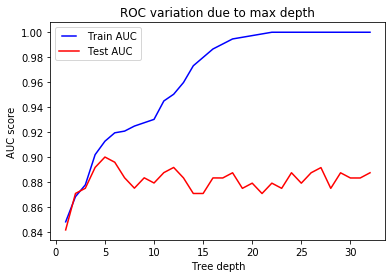

In [106]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    
    # Fitting the default decision tree model
    dt = DecisionTreeClassifier(max_depth = max_depth).fit(X_train, y_train)
    tree_predicted_train = dt.predict(X_train)
    tree_predicted_test = dt.predict(X_test)

    # roc for training data
    fpr_dt_train, tpr_dt_train, _ = roc_curve(y_train, tree_predicted_train)
    roc_auc_dt_train  = auc(fpr_dt_train, tpr_dt_train)
    train_results.append(roc_auc_dt_train)

    # roc for test data
    fpr_dt_test, tpr_dt_test, _ = roc_curve(y_test, tree_predicted_test)
    roc_auc_dt_test = auc(fpr_dt_test, tpr_dt_test)
    test_results.append(roc_auc_dt_test)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.title('ROC variation due to max depth')
plt.show()

2) min_samples_split

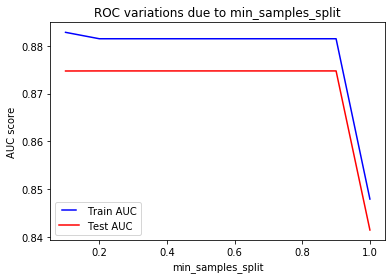

In [107]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits :
    
    # Fitting the default decision tree model
    dt = DecisionTreeClassifier(min_samples_split = min_samples_split).fit(X_train, y_train)
    tree_predicted_train = dt.predict(X_train)
    tree_predicted_test = dt.predict(X_test)

    # roc for training data
    fpr_dt_train, tpr_dt_train, _ = roc_curve(y_train, tree_predicted_train)
    roc_auc_dt_train  = auc(fpr_dt_train, tpr_dt_train)
    train_results.append(roc_auc_dt_train)

    # roc for test data
    fpr_dt_test, tpr_dt_test, _ = roc_curve(y_test, tree_predicted_test)
    roc_auc_dt_test = auc(fpr_dt_test, tpr_dt_test)
    test_results.append(roc_auc_dt_test)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min_samples_split')
plt.title('ROC variations due to min_samples_split')
plt.show()

3) min_sample_leaf

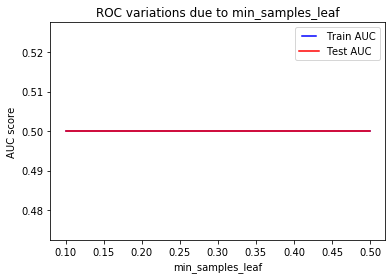

In [108]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs :
    
    # Fitting the default decision tree model
    dt = DecisionTreeClassifier(min_samples_leaf = min_samples_leaf).fit(X_train, y_train)
    tree_predicted_train = dt.predict(X_train)
    tree_predicted_test = dt.predict(X_test)

    # roc for training data
    fpr_dt_train, tpr_dt_train, _ = roc_curve(y_train, tree_predicted_train)
    roc_auc_dt_train  = auc(fpr_dt_train, tpr_dt_train)
    train_results.append(roc_auc_dt_train)

    # roc for test data
    fpr_dt_test, tpr_dt_test, _ = roc_curve(y_test, tree_predicted_test)
    roc_auc_dt_test = auc(fpr_dt_test, tpr_dt_test)
    test_results.append(roc_auc_dt_test)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min_samples_leaf')
plt.title('ROC variations due to min_samples_leaf')
plt.show()

4) max_features 


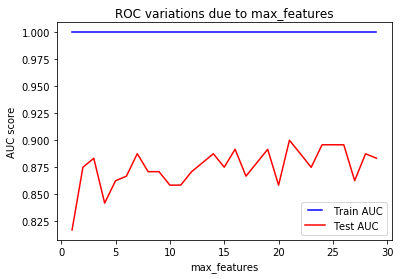

In [111]:
max_features = list(range(1,X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    
    # Fitting the default decision tree model
    dt = DecisionTreeClassifier(max_features = max_feature).fit(X_train, y_train)
    tree_predicted_train = dt.predict(X_train)
    tree_predicted_test = dt.predict(X_test)

    # roc for training data
    fpr_dt_train, tpr_dt_train, _ = roc_curve(y_train, tree_predicted_train)
    roc_auc_dt_train  = auc(fpr_dt_train, tpr_dt_train)
    train_results.append(roc_auc_dt_train)

    # roc for test data
    fpr_dt_test, tpr_dt_test, _ = roc_curve(y_test, tree_predicted_test)
    roc_auc_dt_test = auc(fpr_dt_test, tpr_dt_test)
    test_results.append(roc_auc_dt_test)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max_features')
plt.title('ROC variations due to max_features')
plt.show()

**Summary**
* Considering all features (max_features) while splitting the node overfits the train and underfits on the unseen data. We will take max_features around between 18 and 25.
* min_samples_split to be taken between 0.2 - 0.4 indicating 20 % - 40 % training instances to be taken while spliting a decision at root nodes.
* For Max depth at around 5, there tends to be the perfect trade off between train test performance.

We will take these ranges and tune out model at around these ranges.

#### Hypterparameter Tuning

In [7]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint

x = pd.datetime.now()

# Feature scaling
X = credit.iloc[:,:-1]
y = credit.iloc[:,-1].values
X = StandardScaler().fit_transform(X)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
 
# Classifier
dt = DecisionTreeClassifier()

# Parameters to be tuned
dt_param_grid = {'max_depth': [1, 2, 3, 4, 5, 6],
                'max_features': [1, 2, 3, 4, 5, 20, 21, 22, 23, 24, 25, 'auto', 'sqrt', 'log2'],
                'criterion': ['gini','entropy'],
                'min_samples_leaf': randint(1, 9),
                'class_weight': ['balanced', {0:1, 1:10}, {0:1, 1:100}, {0:0.173, 1:99.826}]
                }

# Crossvalidation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)

# Instantiate the grid search
dt_grid_model = RandomizedSearchCV(dt, dt_param_grid, scoring = 'roc_auc', cv = kfold)

# Fitting the classifier
grid_result = dt_grid_model.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
y = pd.datetime.now()
print('Total Execution Time {}'.format(y-x))

Best: 0.932089 using {'class_weight': {0: 1, 1: 10}, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 20, 'min_samples_leaf': 2}
0.932089 (0.035018) with: {'class_weight': {0: 1, 1: 10}, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 20, 'min_samples_leaf': 2}
0.915059 (0.032237) with: {'class_weight': {0: 1, 1: 10}, 'criterion': 'gini', 'max_depth': 2, 'max_features': 24, 'min_samples_leaf': 5}
0.855567 (0.051437) with: {'class_weight': {0: 0.173, 1: 99.826}, 'criterion': 'entropy', 'max_depth': 1, 'max_features': 'log2', 'min_samples_leaf': 5}
0.918573 (0.051432) with: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 5, 'max_features': 23, 'min_samples_leaf': 8}
0.848810 (0.029363) with: {'class_weight': {0: 1, 1: 10}, 'criterion': 'gini', 'max_depth': 6, 'max_features': 1, 'min_samples_leaf': 5}
0.910280 (0.038427) with: {'class_weight': {0: 0.173, 1: 99.826}, 'criterion': 'gini', 'max_depth': 5, 'max_features': 24, 'min_samples_leaf': 6}
0.925540 (0

### Fitting the best model Decision tree Model

In [17]:
dt_tuned_1 = DecisionTreeClassifier(class_weight = {0: 1, 1: 10}, criterion = 'entropy', max_depth = 3, max_features = 20, min_samples_leaf = 2).fit(X_train, y_train)
tree_predicted_train = dt_tuned_1.predict(X_train)
tree_predicted_test = dt_tuned_1.predict(X_test)

# roc for training data
fpr_dt_train, tpr_dt_train, _ = roc_curve(y_train, tree_predicted_train)
roc_auc_dt_train  = auc(fpr_dt_train, tpr_dt_train)

# roc for test data
fpr_dt_test, tpr_dt_test, _ = roc_curve(y_test, tree_predicted_test)
roc_auc_dt_test = auc(fpr_dt_test, tpr_dt_test)

print('ROC Training : {}'.format(roc_auc_dt_train))
print('ROC Test: {}'.format(roc_auc_dt_test))

ROC Training : 0.9151045093334974
ROC Test: 0.8998241467600799


Finally, let's conclude that our SVM performed better than the Decision tree. Actually, our data holds linear relationships and decision tree works exceptionally well for non-linear data. 

You can try other algorithms also, I majorly focused on SVM as I wanted to learn about it. There is no special algorithm but your understanding level based on the size, structure, data distrubutions, features and domain knowledge will help you work through it.

Constructive criticism is most welcome. I am still learning, thus bound to make mistakes. If you want to connect with me to learn and grow together you can connect with me on [LinkedIn](https://www.linkedin.com/in/puneet-rajput-3534a3154/).